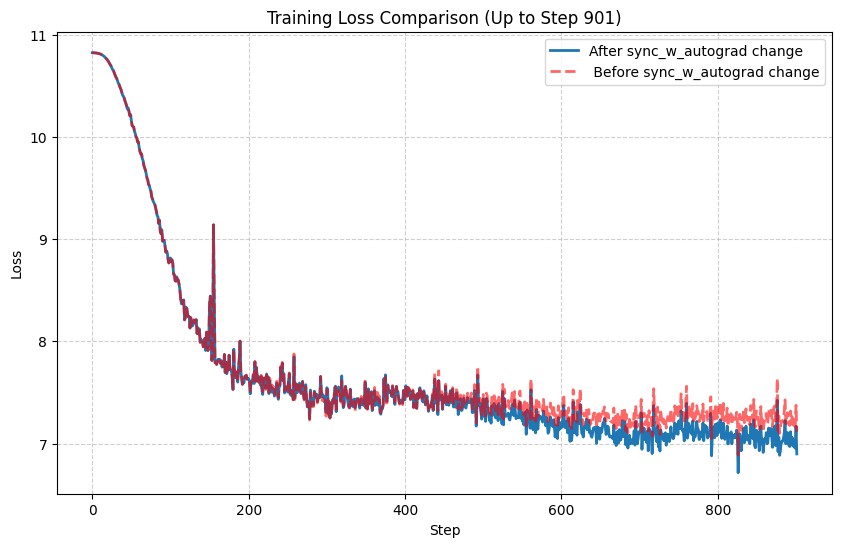

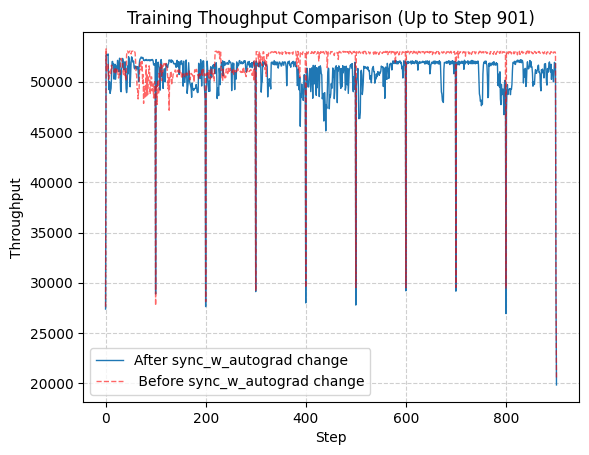

Max. Throughput new: 52770.727517
Avg. Throughput new: 50784.34336023947
Min Train Loss new: 6.713941
Min Val Loss new: 7.03154
Avg. Time new: 1297.664571754989
Avg. Data Time new: 0.1765686917960089
Avg. Forward Time new: 298.18074049002223
Avg. Loss Time new: 107.9539060864745
Avg. Backward Time new: 848.2123282505543
Avg. clip_grad Time new: 20.5978357827051
Avg. Optimizer Time new: 8.767935148558758
Avg. Tok_Emb Time new: 34.31251820509978
Avg. Pos_Emb Time new: 0.22511187583148556
Avg. Mlp Time new: 65.46543077827052
Avg. Ln_f Time new: 1.1426977915742793
Avg. LM Head Time new: 171.60884421286033

Max. Throughput old: 53268.808535
Avg. Throughput old: 51948.19544275721
Min Train Loss old: 6.888734
Min Val Loss old: 7.236063
Avg. Time old: 1268.3985860864746
Avg. Data Time old: 0.2074321241685144
Avg. Forward Time old: 300.9082851031042
Avg. Loss Time old: 107.29183891019956
Avg. Backward Time old: 816.9247232926829
Avg. clip_grad Time old: 20.620170558758318
Avg. Optimizer Time ol

In [86]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log31.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log30.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After sync_w_autograd change', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before sync_w_autograd change',linewidth=2, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After sync_w_autograd change', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before sync_w_autograd change',linewidth=1, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

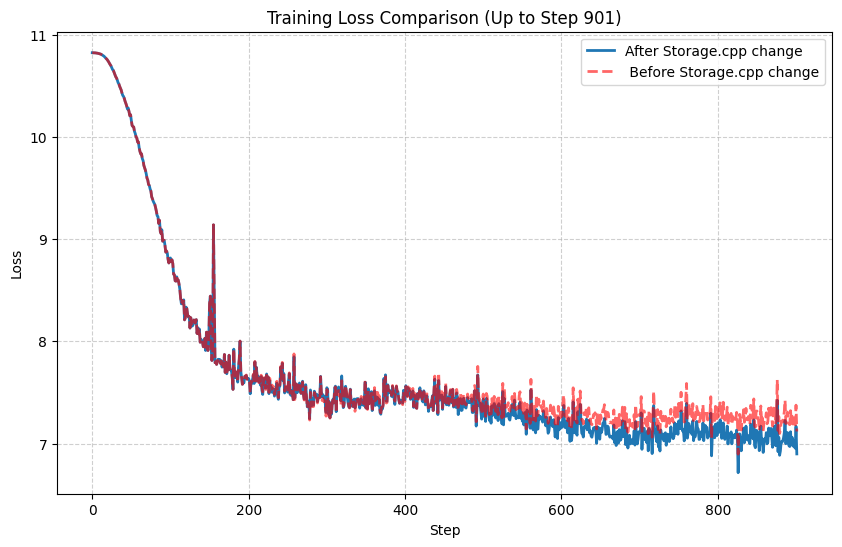

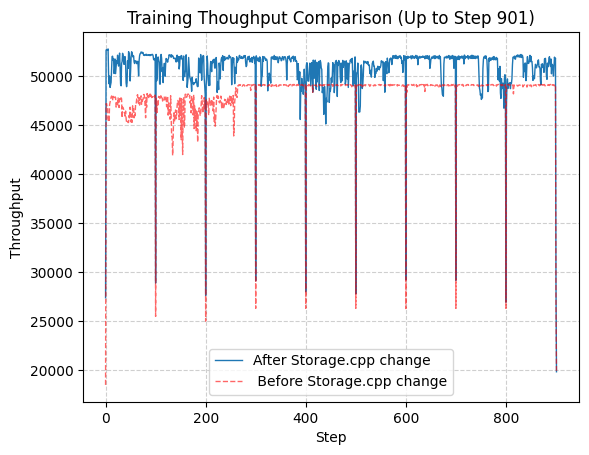

Max. Throughput new: 52770.727517
Avg. Throughput new: 50784.34336023947
Min Train Loss new: 6.713941
Min Val Loss new: 7.03154
Avg. Time new: 1297.664571754989
Avg. Data Time new: 0.1765686917960089
Avg. Forward Time new: 298.18074049002223
Avg. Loss Time new: 107.9539060864745
Avg. Backward Time new: 848.2123282505543
Avg. clip_grad Time new: 20.5978357827051
Avg. Optimizer Time new: 8.767935148558758
Avg. Tok_Emb Time new: 34.31251820509978
Avg. Pos_Emb Time new: 0.22511187583148556
Avg. Mlp Time new: 65.46543077827052
Avg. Ln_f Time new: 1.1426977915742793
Avg. LM Head Time new: 171.60884421286033

Max. Throughput old: 49162.166102
Avg. Throughput old: 48170.118065279385
Min Train Loss old: 6.89548
Min Val Loss old: 7.239554
Avg. Time old: 1369.3594777250555
Avg. Data Time old: 0.2672129135254989
Avg. Forward Time old: 370.6503291286032
Avg. Loss Time old: 106.49405441130821
Avg. Backward Time old: 845.9983589268293
Avg. clip_grad Time old: 20.657847022172948
Avg. Optimizer Time ol

In [ ]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log30.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log29.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After Storage.cpp change', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before Storage.cpp change',linewidth=2, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After Storage.cpp change', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before Storage.cpp change',linewidth=1, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

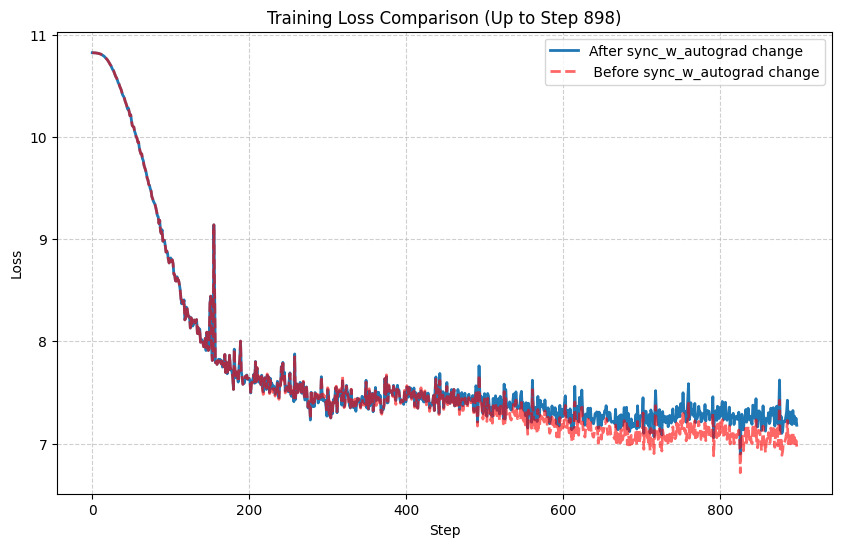

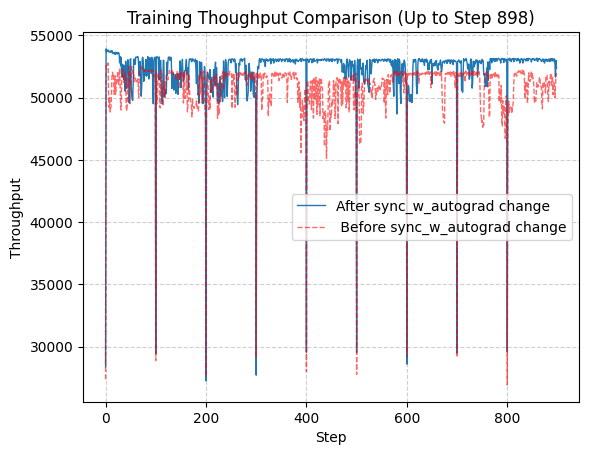

Max. Throughput new: 53905.494702
Avg. Throughput new: 52251.30489985095
Min Train Loss new: 6.897294
Min Val Loss new: 7.26026
Avg. Time new: 1259.2744379466071
Avg. Data Time new: 0.19658400889877642
Avg. Forward Time new: 297.50757643047825
Avg. Loss Time new: 106.181717054505
Avg. Backward Time new: 815.4888543181313
Avg. clip_grad Time new: 20.66411247497219
Avg. Optimizer Time new: 8.764394571746385
Avg. Tok_Emb Time new: 35.08550581535039
Avg. Pos_Emb Time new: 0.21723696551724136
Avg. Mlp Time new: 64.72240548832036
Avg. Ln_f Time new: 1.1325717997775306
Avg. LM Head Time new: 170.27363018464965

Max. Throughput old: 52770.727517
Avg. Throughput old: 50841.88144302893
Min Train Loss old: 6.713941
Min Val Loss old: 7.079598
Avg. Time old: 1294.3961449110122
Avg. Data Time old: 0.17655667185761958
Avg. Forward Time old: 298.18064332035595
Avg. Loss Time old: 107.95337909232482
Avg. Backward Time old: 848.212530567297
Avg. clip_grad Time old: 20.597792927697444
Avg. Optimizer Time

In [162]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log56.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log31.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After sync_w_autograd change', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before sync_w_autograd change',linewidth=2, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After sync_w_autograd change', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before sync_w_autograd change',linewidth=1, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

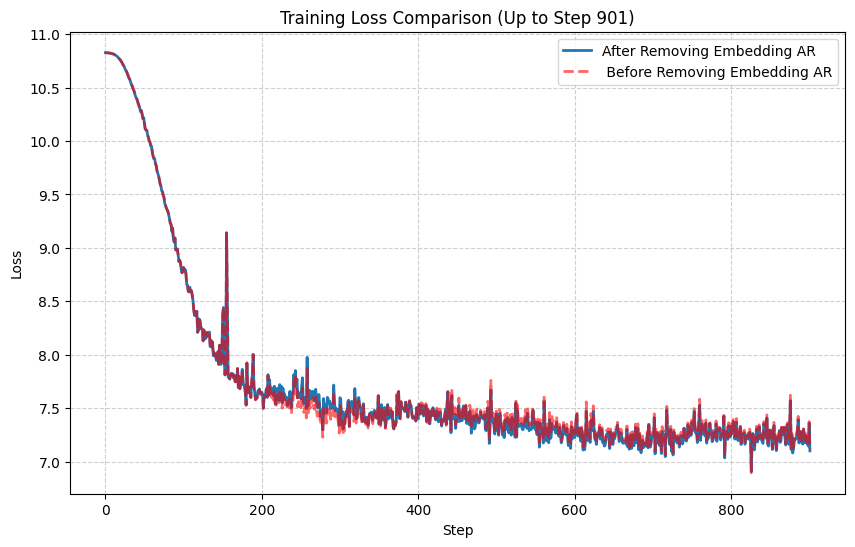

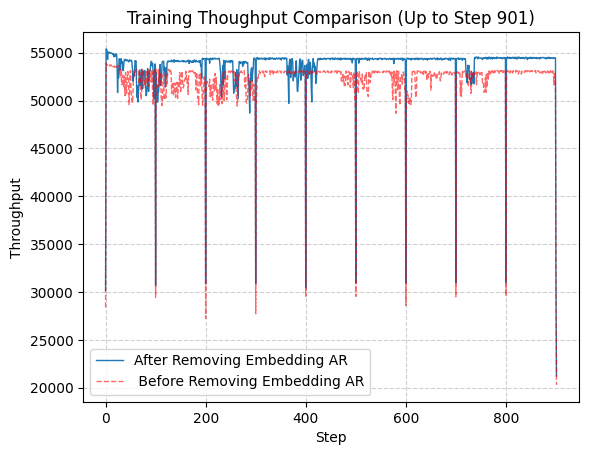

Max. Throughput new: 55402.187808
Avg. Throughput new: 53700.460007677386
Min Train Loss new: 6.907799
Min Val Loss new: 7.224679
Avg. Time new: 1226.3356282660754
Avg. Data Time new: 0.19559460753880265
Avg. Forward Time new: 266.88769935254993
Avg. Loss Time new: 104.3463004279379
Avg. Backward Time new: 812.9370779146341
Avg. clip_grad Time new: 20.590937731707317
Avg. Optimizer Time new: 8.737000975609757
Avg. Tok_Emb Time new: 5.164207325942351
Avg. Pos_Emb Time new: 0.19102932150776053
Avg. Mlp Time new: 64.9704900044346
Avg. Ln_f Time new: 1.1397250554323723
Avg. LM Head Time new: 171.05744954434593

Max. Throughput old: 53905.494702
Avg. Throughput old: 52190.42552879934
Min Train Loss old: 6.897294
Min Val Loss old: 7.240385
Avg. Time old: 1262.5239908625276
Avg. Data Time old: 0.19661154767184036
Avg. Forward Time old: 297.49411864301555
Avg. Loss Time old: 106.17701997339246
Avg. Backward Time old: 815.4894197283813
Avg. clip_grad Time old: 20.66420948558758
Avg. Optimizer T

In [2]:
#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_new = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log58.csv')
df_old = pd.read_csv('/home/blu-bridge25/TP/TensorParallelismBeta/DTensor/TP_Training_logs/TP_Training_log56.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='After Removing Embedding AR', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label=' Before Removing Embedding AR',linewidth=2, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='After Removing Embedding AR', linewidth=1)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label=' Before Removing Embedding AR',linewidth=1, linestyle = "--", color = "red", alpha=0.6)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time new:",df_new['dt_ms'].mean())
print("Avg. Data Time new:",df_new['timer_data'][:].mean())
print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss old:",df_old_truncated['loss'][:].min())
print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())